<a href="https://colab.research.google.com/github/SankitSinghal/Machine-Learning-project/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write a Python Program to implement K-Means Clustering.**

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the Wine dataset
df = load_wine(as_frame=True)
df = df.frame
df.drop('target', axis =1, inplace=True)
print(df.iloc[:,:5])

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium
0      14.23        1.71  2.43               15.6      127.0
1      13.20        1.78  2.14               11.2      100.0
2      13.16        2.36  2.67               18.6      101.0
3      14.37        1.95  2.50               16.8      113.0
4      13.24        2.59  2.87               21.0      118.0
..       ...         ...   ...                ...        ...
173    13.71        5.65  2.45               20.5       95.0
174    13.40        3.91  2.48               23.0      102.0
175    13.27        4.28  2.26               20.0      120.0
176    13.17        2.59  2.37               20.0      120.0
177    14.13        4.10  2.74               24.5       96.0

[178 rows x 5 columns]


In [ ]:
#Standardize the dataset
scaler =StandardScaler()
features =scaler.fit_transform(df)
scaled_df =pd.DataFrame(features,columns=df.columns)
print(scaled_df.iloc[:,:5])

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium
0    1.518613   -0.562250  0.232053          -1.169593   1.913905
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145
2    0.196879    0.021231  1.109334          -0.268738   0.088358
3    1.691550   -0.346811  0.487926          -0.809251   0.930918
4    0.295700    0.227694  1.840403           0.451946   1.281985
..        ...         ...       ...                ...        ...
173  0.876275    2.974543  0.305159           0.301803  -0.332922
174  0.493343    1.412609  0.414820           1.052516   0.158572
175  0.332758    1.744744 -0.389355           0.151661   1.422412
176  0.209232    0.227694  0.012732           0.151661   1.422412
177  1.395086    1.583165  1.365208           1.502943  -0.262708

[178 rows x 5 columns]


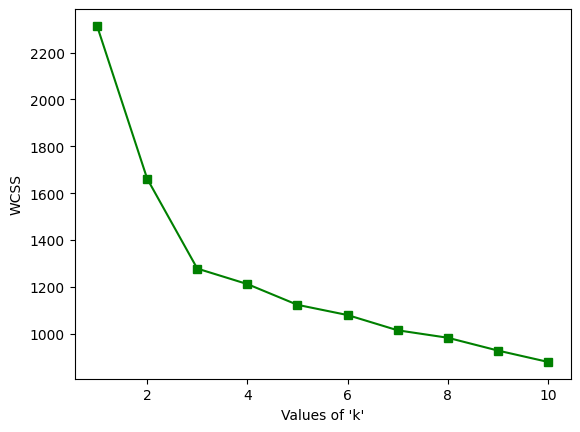

In [ ]:
#Elbow Method to determine number of clusters
x=scaled_df.values
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Apply K-Means Clustering
model=KMeans(n_clusters=3, random_state=42)
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#Reducing dataset
pca=PCA(n_components=2)
reduced=pd.DataFrame(data=pca.fit_transform(x),columns=['PCA1','PCA2'])
print(reduced.head())

       PCA1      PCA2
0  3.316751  1.443463
1  2.209465 -0.333393
2  2.516740  1.031151
3  3.757066  2.756372
4  1.008908  0.869831


In [ ]:
#Get cluster centers and labels
centers=pca.transform(model.cluster_centers_)
labels=model.labels_
print("centers: ",centers[:5])
print("labels: ",labels[:5])

centers:  [[-0.03695661 -1.77223945]
 [-2.72003575  1.12565126]
 [ 2.2761936   0.93205403]]
labels:  [2 2 2 2 2]


In [ ]:
# Plot the clusters using first two features
plt.figure(figsize=(7,5))
plt.scatter(reduced['PCA1'],reduced['PCA2'],c=model.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

NameError: name 'plt' is not defined